In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('data_2022.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Timestamp,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene (µg/m³),Toluene (µg/m³),Xylene (µg/m³),O Xylene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT,RH,WS,WD,RF,TOT-RF (mm),SR,BP,VWS (m/s)
0,01-01-2022 00:00,432.0,469.75,201.75,37.93,184.65,33.35,54.12,2.72,14.25,NaN,NaN,NaN,NaN,NaN,NaN,5.25,81.90,0.3,150.50,NaN,0,5.42,976.5,0.08
1,01-01-2022 01:00,366.5,402.25,120.88,45.18,122.58,33.70,39.83,2.02,14.00,NaN,NaN,NaN,NaN,NaN,NaN,4.90,82.28,0.3,194.75,NaN,0,5.30,976.5,NaN
2,01-01-2022 02:00,319.5,352.25,95.70,61.20,110.60,27.40,23.50,1.80,14.03,NaN,NaN,NaN,NaN,NaN,NaN,5.05,82.18,0.3,206.00,NaN,0,5.30,976.5,NaN
3,01-01-2022 03:00,281.5,319.75,95.70,62.15,111.05,25.15,19.75,1.68,14.10,NaN,NaN,NaN,NaN,NaN,NaN,5.00,82.02,0.3,220.00,NaN,0,5.40,976.5,NaN
4,01-01-2022 04:00,271.5,318.00,71.85,58.97,89.95,25.85,23.38,1.30,13.95,NaN,NaN,NaN,NaN,NaN,NaN,4.58,82.02,0.3,197.50,NaN,0,5.35,976.5,0.00


In [5]:
df.columns

Index(['Timestamp', 'PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3', 'SO2', 'CO',
       'Ozone', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT',
       'RH', 'WS', 'WD', 'RF', 'TOT-RF (mm)', 'SR', 'BP', 'VWS (m/s)'],
      dtype='object')

In [6]:
df.drop(columns=['Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)','O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)','RF', 'TOT-RF (mm)','VWS (m/s)'], inplace=True)

In [7]:
df.head()

,Timestamp,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP
0,01-01-2022 00:00,432.0,469.75,201.75,37.93,184.65,33.35,54.12,2.72,14.25,5.25,81.90,0.3,150.50,5.42,976.5
1,01-01-2022 01:00,366.5,402.25,120.88,45.18,122.58,33.70,39.83,2.02,14.00,4.90,82.28,0.3,194.75,5.30,976.5
2,01-01-2022 02:00,319.5,352.25,95.70,61.20,110.60,27.40,23.50,1.80,14.03,5.05,82.18,0.3,206.00,5.30,976.5
3,01-01-2022 03:00,281.5,319.75,95.70,62.15,111.05,25.15,19.75,1.68,14.10,5.00,82.02,0.3,220.00,5.40,976.5
4,01-01-2022 04:00,271.5,318.00,71.85,58.97,89.95,25.85,23.38,1.30,13.95,4.58,82.02,0.3,197.50,5.35,976.5


In [8]:
df.isna().sum() 

Timestamp      0
PM2.5        213
PM10         184
NO           156
NO2          130
Nox          136
NH3          205
SO2          396
CO           901
Ozone        235
AT            86
RH            94
WS            86
WD            86
SR            86
BP            86
dtype: int64

In [9]:
df = df.fillna(method='ffill')

C:\Users\kumar\AppData\Local\Temp\ipykernel_22744\569672361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [10]:
df.isna().sum() 

Timestamp    0
PM2.5        0
PM10         0
NO           0
NO2          0
Nox          0
NH3          0
SO2          0
CO           0
Ozone        0
AT           0
RH           0
WS           0
WD           0
SR           0
BP           0
dtype: int64

In [11]:
df.index = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

In [12]:
df.head()

,Timestamp,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP
Timestamp,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,01-01-2022 00:00,432.0,469.75,201.75,37.93,184.65,33.35,54.12,2.72,14.25,5.25,81.90,0.3,150.50,5.42,976.5
2022-01-01 01:00:00,01-01-2022 01:00,366.5,402.25,120.88,45.18,122.58,33.70,39.83,2.02,14.00,4.90,82.28,0.3,194.75,5.30,976.5
2022-01-01 02:00:00,01-01-2022 02:00,319.5,352.25,95.70,61.20,110.60,27.40,23.50,1.80,14.03,5.05,82.18,0.3,206.00,5.30,976.5
2022-01-01 03:00:00,01-01-2022 03:00,281.5,319.75,95.70,62.15,111.05,25.15,19.75,1.68,14.10,5.00,82.02,0.3,220.00,5.40,976.5
2022-01-01 04:00:00,01-01-2022 04:00,271.5,318.00,71.85,58.97,89.95,25.85,23.38,1.30,13.95,4.58,82.02,0.3,197.50,5.35,976.5


In [13]:
df.drop(columns=['Timestamp'], inplace=True)

In [14]:
pm2_mean = df['PM2.5'].mean()
pm2_std = df['PM2.5'].std()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled.head()


,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP
Timestamp,,,,,,,,,,,,,,,
2022-01-01 00:00:00,3.839297,2.301016,1.699831,-0.219458,1.448421,1.007771,5.889937,1.593152,-0.696211,-2.015509,0.756711,-0.760677,-1.217501,-0.697071,-1.936013
2022-01-01 01:00:00,3.070729,1.725967,0.802452,0.016187,0.706198,1.043993,3.994114,0.837360,-0.701493,-2.053758,0.775638,-0.760677,0.695952,-0.697997,-1.936013
2022-01-01 02:00:00,2.519237,1.300005,0.523041,0.536882,0.562944,0.391991,1.827648,0.599826,-0.700860,-2.037366,0.770657,-0.760677,1.182424,-0.697997,-1.936013
2022-01-01 03:00:00,2.073351,1.023129,0.523041,0.567759,0.568325,0.159133,1.330144,0.470261,-0.699380,-2.042830,0.762688,-0.760677,1.787810,-0.697225,-1.936013
2022-01-01 04:00:00,1.956012,1.008220,0.258388,0.464400,0.316014,0.231577,1.811728,0.059974,-0.702550,-2.088728,0.762688,-0.760677,0.814868,-0.697611,-1.936013


In [16]:
df_scaled['Seconds'] = df_scaled.index.map(pd.Timestamp.timestamp)
df_scaled.head()


,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP,Seconds
Timestamp,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,3.839297,2.301016,1.699831,-0.219458,1.448421,1.007771,5.889937,1.593152,-0.696211,-2.015509,0.756711,-0.760677,-1.217501,-0.697071,-1.936013,1.640995e+09
2022-01-01 01:00:00,3.070729,1.725967,0.802452,0.016187,0.706198,1.043993,3.994114,0.837360,-0.701493,-2.053758,0.775638,-0.760677,0.695952,-0.697997,-1.936013,1.640999e+09
2022-01-01 02:00:00,2.519237,1.300005,0.523041,0.536882,0.562944,0.391991,1.827648,0.599826,-0.700860,-2.037366,0.770657,-0.760677,1.182424,-0.697997,-1.936013,1.641002e+09
2022-01-01 03:00:00,2.073351,1.023129,0.523041,0.567759,0.568325,0.159133,1.330144,0.470261,-0.699380,-2.042830,0.762688,-0.760677,1.787810,-0.697225,-1.936013,1.641006e+09
2022-01-01 04:00:00,1.956012,1.008220,0.258388,0.464400,0.316014,0.231577,1.811728,0.059974,-0.702550,-2.088728,0.762688,-0.760677,0.814868,-0.697611,-1.936013,1.641010e+09


In [17]:
df = df_scaled.copy()

In [18]:
day = 60*60*24
year = 365.2425*day
month = 30.436875*day

df['Day sin'] = np.sin(df['Seconds'] * (2* np.pi / day))
df['Day cos'] = np.cos(df['Seconds'] * (2 * np.pi / day))
df['Year sin'] = np.sin(df['Seconds'] * (2 * np.pi / year))
df['Year cos'] = np.cos(df['Seconds'] * (2 * np.pi / year))
df['Month sin'] = np.sin(df['Seconds'] * (2 * np.pi / month))
df['Month cos'] = np.cos(df['Seconds'] * (2 * np.pi / month))


In [19]:
df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP,Seconds,Day sin,Day cos,Year sin,Year cos,Month sin,Month cos
Timestamp,,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,3.839297,2.301016,1.699831,-0.219458,1.448421,1.007771,5.889937,1.593152,-0.696211,-2.015509,0.756711,-0.760677,-1.217501,-0.697071,-1.936013,1.640995e+09,-8.652299e-12,1.000000,0.006709,0.999977,0.080422,0.996761
2022-01-01 01:00:00,3.070729,1.725967,0.802452,0.016187,0.706198,1.043993,3.994114,0.837360,-0.701493,-2.053758,0.775638,-0.760677,0.695952,-0.697997,-1.936013,1.640999e+09,2.588190e-01,0.965926,0.007426,0.999972,0.088992,0.996032
2022-01-01 02:00:00,2.519237,1.300005,0.523041,0.536882,0.562944,0.391991,1.827648,0.599826,-0.700860,-2.037366,0.770657,-0.760677,1.182424,-0.697997,-1.936013,1.641002e+09,5.000000e-01,0.866025,0.008143,0.999967,0.097556,0.995230
2022-01-01 03:00:00,2.073351,1.023129,0.523041,0.567759,0.568325,0.159133,1.330144,0.470261,-0.699380,-2.042830,0.762688,-0.760677,1.787810,-0.697225,-1.936013,1.641006e+09,7.071068e-01,0.707107,0.008859,0.999961,0.106113,0.994354
2022-01-01 04:00:00,1.956012,1.008220,0.258388,0.464400,0.316014,0.231577,1.811728,0.059974,-0.702550,-2.088728,0.762688,-0.760677,0.814868,-0.697611,-1.936013,1.641010e+09,8.660254e-01,0.500000,0.009576,0.999954,0.114662,0.993405


In [20]:
df.drop(columns=['Seconds'], inplace=True)


In [21]:
df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP,Day sin,Day cos,Year sin,Year cos,Month sin,Month cos
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,3.839297,2.301016,1.699831,-0.219458,1.448421,1.007771,5.889937,1.593152,-0.696211,-2.015509,0.756711,-0.760677,-1.217501,-0.697071,-1.936013,-8.652299e-12,1.000000,0.006709,0.999977,0.080422,0.996761
2022-01-01 01:00:00,3.070729,1.725967,0.802452,0.016187,0.706198,1.043993,3.994114,0.837360,-0.701493,-2.053758,0.775638,-0.760677,0.695952,-0.697997,-1.936013,2.588190e-01,0.965926,0.007426,0.999972,0.088992,0.996032
2022-01-01 02:00:00,2.519237,1.300005,0.523041,0.536882,0.562944,0.391991,1.827648,0.599826,-0.700860,-2.037366,0.770657,-0.760677,1.182424,-0.697997,-1.936013,5.000000e-01,0.866025,0.008143,0.999967,0.097556,0.995230
2022-01-01 03:00:00,2.073351,1.023129,0.523041,0.567759,0.568325,0.159133,1.330144,0.470261,-0.699380,-2.042830,0.762688,-0.760677,1.787810,-0.697225,-1.936013,7.071068e-01,0.707107,0.008859,0.999961,0.106113,0.994354
2022-01-01 04:00:00,1.956012,1.008220,0.258388,0.464400,0.316014,0.231577,1.811728,0.059974,-0.702550,-2.088728,0.762688,-0.760677,0.814868,-0.697611,-1.936013,8.660254e-01,0.500000,0.009576,0.999954,0.114662,0.993405


In [ ]:
df.to_csv('preprocessed_data.csv')

In [22]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = list(df_as_np[i:i+window_size])
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [23]:
X, y = df_to_X_y(df, window_size=5)

In [24]:
X.shape, y.shape

((8755, 5, 21), (8755,))

In [25]:
y

array([1.63626431, 1.54532688, 1.38691974, ..., 0.50688006, 0.86182939,
       0.73275691])

In [26]:
X_train, y_train = X[:6000], y[:6000]
X_val, y_val = X[6000:7000], y[6000:7000]
X_test, y_test = X[7000:], y[7000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6000, 5, 21), (6000,), (1000, 5, 21), (1000,), (1755, 5, 21), (1755,))

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((5, 21)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,545 (88.07 KB)

 Trainable params: 22,545 (88.07 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
cp4 = ModelCheckpoint('model4/.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp4])

Epoch 1/10


188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.4260 - root_mean_squared_error: 0.6512 - val_loss: 0.0817 - val_root_mean_squared_error: 0.2728
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1994 - root_mean_squared_error: 0.4459 - val_loss: 0.0664 - val_root_mean_squared_error: 0.2426
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1524 - root_mean_squared_error: 0.3902 - val_loss: 0.0608 - val_root_mean_squared_error: 0.2306
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1271 - root_mean_squared_error: 0.3559 - val_loss: 0.0568 - val_root_mean_squared_error: 0.2224
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1013 - root_mean_squared_error: 0.3179 - val_loss: 0.0548 - val_root_mean_squared_error: 0.2175
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0965 - root_mean_squared_error: 0.3103 - val_loss: 0.0521 - val_root_mean_squared_error: 0.2110
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0

In [30]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y, predictions)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


(      Predictions   Actuals
 0        0.056039  1.246113
 1        0.213697  0.841295
 2        0.350309  0.298604
 3        0.274884  0.110862
 4        0.168144  0.093261
 ...           ...       ...
 1750     0.336944  0.313271
 1751     0.417114  0.286870
 1752     0.407487  0.506880
 1753     0.584046  0.861829
 1754     0.805236  0.732757
 
 [1755 rows x 2 columns],
 0.3697025972779186)

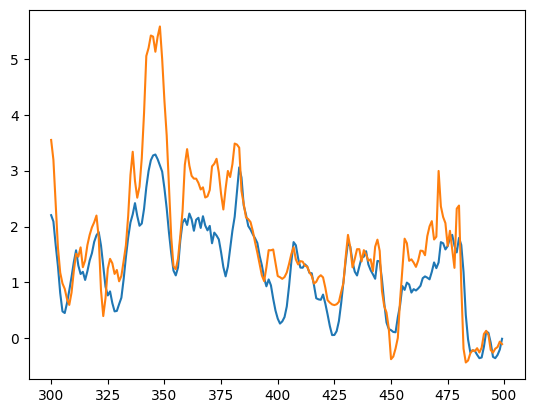

In [31]:
plot_predictions1(model4, X_test, y_test, start=300, end=500)

In [32]:
def postprocess_pm2(arr):
    arr = (arr*pm2_std) + pm2_mean
    return arr

In [33]:
def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    pm2_preds = postprocess_pm2(predictions[:, 0])
    pm2_actuals = postprocess_pm2(y)
    df = pd.DataFrame(data={'PM2.5 Predictions': pm2_preds,
                            'PM2.5 Actuals': pm2_actuals,
                            
                            })
    plt.plot(df['PM2.5 Predictions'][start:end])    
    plt.plot(df['PM2.5 Actuals'][start:end])
    return df[start:end]

 1/55 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,PM2.5 Predictions,PM2.5 Actuals
0,109.578041,211.006062
1,123.014931,176.504093
2,134.658142,130.251453
3,128.229797,114.250539
4,119.132538,112.750454
...,...,...
95,205.679047,225.506890
96,193.882935,215.256305
97,196.498962,215.006290
98,182.620621,210.256019


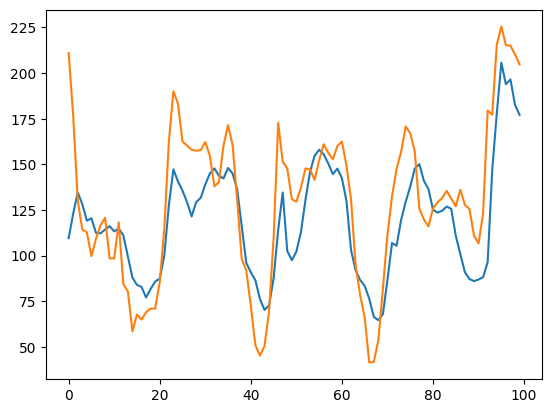

In [34]:
post_processed_df = plot_predictions(model4, X_test, y_test)
post_processed_df